In [2]:
import networkx as nx
import random
from matplotlib import cm
import matplotlib.pyplot as plt

first I'll create a very simplified "subway" system to test my agents

In [3]:
n_nodes = 25
n_passengers = 1
timesteps = 10

class Passenger:
    def __init__(self, home, work):
        self.home = home
        self.work = work
        self.fees = 0
        self.transit_time = 0
        self.current = home
        self.intermediate_stops = []
        
def initialize():
    global passengers
    passengers = []
    
    for i in range(n_passengers):
        p = Passenger(home=random.randint(0, n_nodes-1),
                      work=random.randint(0, n_nodes-1))
        p.path = nx.shortest_path(g, p.home, p.work)
        passengers.append(p)
        g.nodes[p.home]['population'] += 1

        
def update():    
    for p in passengers:
        if p.current == p.home:
            p.route = nx.shortest_path(g, source=p.home, target=p.work)
            g.nodes[p.current]['population'] -= 1
            p.current = p.route[1]
            g.nodes[p.current]['population'] += 1
            p.fees += 1
            p.transit_time += 1
            


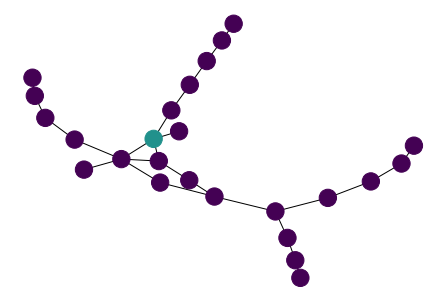

In [12]:
g = nx.random_tree(n_nodes)
g.add_edge(0, 1)
g.add_edge(2, 3)
nx.set_node_attributes(g, 0, 'population')

initialize()
for t in range(timesteps):
    update()

plt.figure()
nx.draw(g, cmap=cm.viridis, vmin=0, vmax=2, 
        node_color=[g.nodes[i]['population'] for i in g.nodes])
plt.show()

at each timestep:
    - move toward next destination
    - add fare
    - add time
    - if desination reached, update to next destination

https://towardsdatascience.com/i-built-the-t-with-python-and-revamped-it-632127364f4e
    
- add 5 minute penalty for transfers
- if population